Accuracy: 0.72


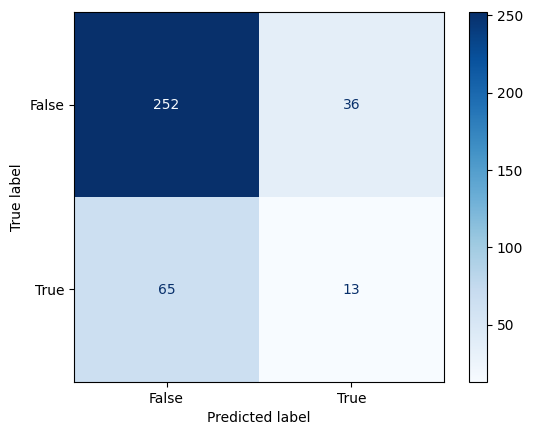

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load cycle data
cycle_data = pd.read_json("data_to_use/cycle_data.json")  # Replace with your file's path

# Preprocess cycle data
cycle_data["start_date"] = pd.to_datetime(cycle_data["period_start_date"])
cycle_data["end_date"] = pd.to_datetime(cycle_data["period_end_date"])

# Create a continuous date range with labels for "on-cycle" days
date_range = pd.date_range(cycle_data["start_date"].min(), cycle_data["end_date"].max())
all_dates = pd.DataFrame({"date": date_range})
all_dates["on_cycle"] = all_dates["date"].apply(
    lambda d: any((d >= start and d <= end) for start, end in zip(cycle_data["start_date"], cycle_data["end_date"]))
)

# Feature engineering
all_dates["day_of_month"] = all_dates["date"].dt.day
all_dates["month"] = all_dates["date"].dt.month
all_dates["day_of_week"] = all_dates["date"].dt.dayofweek

# Define features and target
features = ["day_of_month", "month", "day_of_week"]
target = "on_cycle"

# Prepare data for train-test split
X = all_dates[features]
y = all_dates[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
disp.plot(cmap="Blues")


Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.33      0.50         3
         Low       0.94      1.00      0.97        16
      Medium       0.89      0.94      0.91        17

    accuracy                           0.92        36
   macro avg       0.94      0.76      0.79        36
weighted avg       0.92      0.92      0.90        36



['screen_time_interval_predictor.pkl']

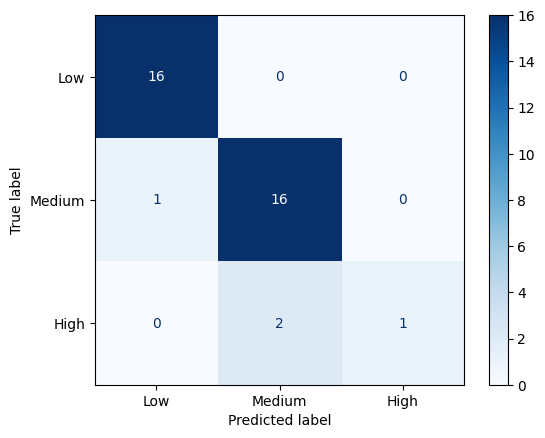

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import joblib

# Load screen time data
data = pd.read_csv("data_to_use/average_time_per_video.csv")

# Preprocess data
data["Date"] = pd.to_datetime(data["Date"])
data["In Cycle"] = data["In Cycle"].apply(lambda x: 1 if x == "Yes" else 0)

# Define intervals for Watch Hours
def categorize_watch_hours(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours <= 5:
        return "Medium"
    else:
        return "High"

data["Watch Hours Category"] = data["Watch Hours"].apply(categorize_watch_hours)

# Features and target
features = ["Videos Watched", "Time per Video (min)", "In Cycle"]
target = "Watch Hours Category"

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues")

# Save the trained model
joblib.dump(model, "screen_time_interval_predictor.pkl")



Class Distribution Before Merging Rare Classes:
Videos Watched Category
[0, 200)        50
[200, 400)      37
[600, 800)      34
[400, 600)      32
[800, 1000)     17
[1000, 1200)     4
[1200, 1400)     2
[1400, 1600)     2
[1600, 1800)     1
Name: count, dtype: int64

Class Distribution After Merging Rare Classes:
Videos Watched Category
[0, 200)        50
[200, 400)      37
[600, 800)      34
[400, 600)      32
[800, 1000)     17
[1000, 1200)     4
[1200, 1400)     2
[1400, 1600)     2
Other            1
Name: count, dtype: int64

Falling back to non-stratified train-test split.

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

    [0, 200)       0.83      0.91      0.87        11
[1000, 1200)       0.00      0.00      0.00         2
  [200, 400)       0.67      0.67      0.67         6
  [400, 600)       0.86      0.86      0.86         7
  [600, 800)       0.60      0.60      0.60         5
 [800, 1000)       0.50      0.60      0.55   

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


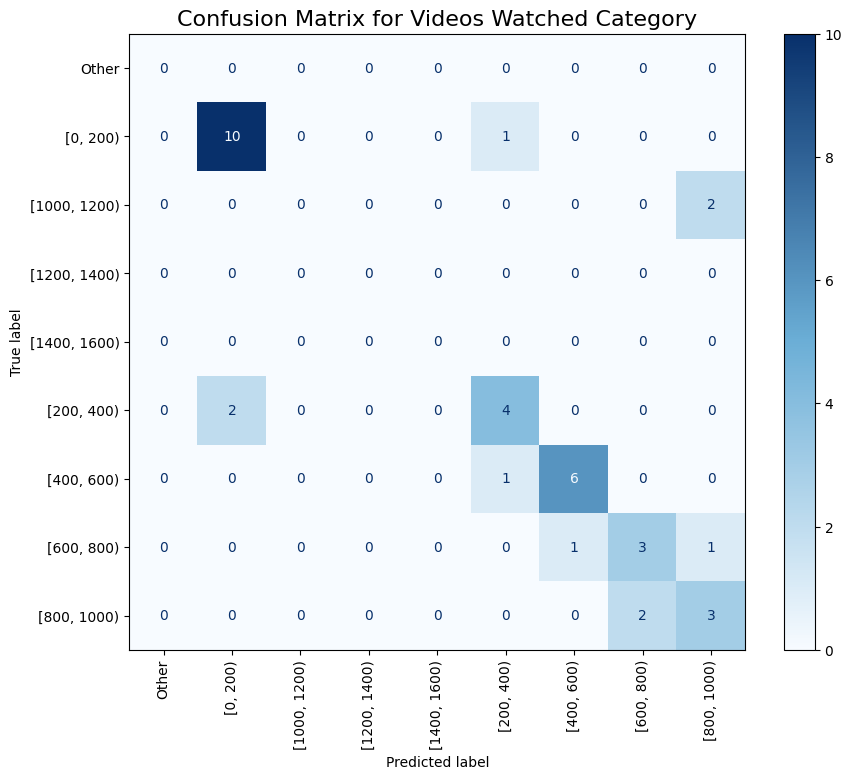

['videos_watched_fixed_intervals_predictor.pkl']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import joblib

# Load screen time data
data = pd.read_csv("data_to_use/average_time_per_video.csv")

# Preprocess data
data["Date"] = pd.to_datetime(data["Date"])
data["In Cycle"] = data["In Cycle"].apply(lambda x: 1 if x == "Yes" else 0)

# Define intervals for Videos Watched
def categorize_videos_watched(videos):
    # Create intervals increasing by 200
    interval_start = (videos // 200) * 200
    interval_end = interval_start + 200
    return f"[{interval_start}, {interval_end})"

data["Videos Watched Category"] = data["Videos Watched"].apply(categorize_videos_watched)

# Features and target
features = ["Watch Hours", "Time per Video (min)", "In Cycle"]
target = "Videos Watched Category"

X = data[features]
y = data[target]

# Check class distribution
print("\nClass Distribution Before Merging Rare Classes:")
print(y.value_counts())

# Merge rare classes into "Other" and drop rows with less than 2 samples
def merge_and_validate_classes(data, target, threshold=2):
    value_counts = data[target].value_counts()
    rare_classes = value_counts[value_counts < threshold].index
    data[target] = data[target].apply(lambda x: "Other" if x in rare_classes else x)
    return data

# Apply merging
data = merge_and_validate_classes(data, target)

# Update features and target after merging
X = data[features]
y = data[target]

# Check class distribution after merging
print("\nClass Distribution After Merging Rare Classes:")
print(y.value_counts())

# Perform train-test split with stratified sampling
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
except ValueError as e:
    print("\nWarning:", e)
    print("Falling back to non-stratified train-test split.")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display confusion matrix with custom colors
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(y.unique()))

# Define a custom colormap
colors = ["#f7fbff", "#6baed6", "#08306b"]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors)

# Plot the confusion matrix with the custom colormap
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap=cmap, xticks_rotation="vertical")
plt.title("Confusion Matrix for Videos Watched Category", fontsize=16)
plt.show()

# Save the trained model
joblib.dump(model, "videos_watched_fixed_intervals_predictor.pkl")


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error
import joblib

# Load data
cycle_data = pd.read_json("data_to_use/cycle_data.json")  # Replace with the actual file
screen_time_data = pd.read_csv("data_to_use/average_time_per_video.csv")

# Preprocess cycle data
cycle_data["start_date"] = pd.to_datetime(cycle_data["period_start_date"])
cycle_data["end_date"] = pd.to_datetime(cycle_data["period_end_date"])
cycle_data = cycle_data.sort_values(by="start_date")

# Create a continuous date range with labels for "on-cycle" days
date_range = pd.date_range(cycle_data["start_date"].min(), cycle_data["end_date"].max())
all_dates = pd.DataFrame({"date": date_range})
all_dates["on_cycle"] = all_dates["date"].apply(
    lambda d: any((d >= start and d <= end) for start, end in zip(cycle_data["start_date"], cycle_data["end_date"]))
)

# Add date-related features
all_dates["day_of_week"] = all_dates["date"].dt.dayofweek
all_dates["month"] = all_dates["date"].dt.month
all_dates["day_of_year"] = all_dates["date"].dt.dayofyear

# Split cycle data into training and testing
cycle_cutoff = int(len(all_dates) * 0.8)
cycle_train_data = all_dates.iloc[:cycle_cutoff]  # First 80% for training
cycle_test_data = all_dates.iloc[cycle_cutoff:]   # Last 20% for testing

# Print cycle data ranges
print("Cycle Data:")
print(f"Training Data: {cycle_train_data['date'].min()} to {cycle_train_data['date'].max()}")
print(f"Testing Data: {cycle_test_data['date'].min()} to {cycle_test_data['date'].max()}")

# Preprocess screen time data
screen_time_data["Date"] = pd.to_datetime(screen_time_data["Date"])
screen_time_data["In Cycle"] = screen_time_data["In Cycle"].apply(lambda x: 1 if x == "Yes" else 0)

# Define intervals for Videos Watched
def categorize_videos_watched(videos):
    interval_start = (videos // 200) * 200
    interval_end = interval_start + 200
    return f"[{interval_start}, {interval_end})"

screen_time_data["Videos Watched Category"] = screen_time_data["Videos Watched"].apply(categorize_videos_watched)

# Split screen time data into training and testing
screen_time_cutoff = int(len(screen_time_data) * 0.8)
screen_time_train_data = screen_time_data.iloc[:screen_time_cutoff]
screen_time_test_data = screen_time_data.iloc[screen_time_cutoff:]

print("\nTraining Data Category Distribution:")
print(screen_time_train_data["Videos Watched Category"].value_counts())

# Prepare features and target for oversampling
X_train = screen_time_train_data[videos_features]
y_train = screen_time_train_data["Videos Watched Category"]

# Apply oversampling
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Print distribution after oversampling
print("\nResampled Training Data Category Distribution:")
print(pd.Series(y_resampled).value_counts())

# Train the videos watched model with the resampled data
videos_model.fit(X_resampled, y_resampled)

# Print screen time data ranges
print("\nScreen Time Data:")
print(f"Training Data: {screen_time_train_data['Date'].min()} to {screen_time_train_data['Date'].max()}")
print(f"Testing Data: {screen_time_test_data['Date'].min()} to {screen_time_test_data['Date'].max()}")

# Train the cycle model
cycle_features = ["day_of_week", "month", "day_of_year"]
cycle_model = RandomForestClassifier(random_state=42)
cycle_model.fit(cycle_train_data[cycle_features], cycle_train_data["on_cycle"])

# Train the time per video model
time_features = ["Watch Hours", "In Cycle"]
time_per_video_model = RandomForestRegressor(random_state=42)
time_per_video_model.fit(screen_time_train_data[time_features], screen_time_train_data["Time per Video (min)"])

# Train the videos watched model
videos_features = ["Watch Hours", "Time per Video (min)", "In Cycle"]
videos_model = RandomForestClassifier(random_state=42)
videos_model.fit(screen_time_train_data[videos_features], screen_time_train_data["Videos Watched Category"])

# Save the trained models
joblib.dump(cycle_model, "cycle_model.pkl")
joblib.dump(time_per_video_model, "time_per_video_model.pkl")
joblib.dump(videos_model, "videos_model.pkl")

# Unified prediction function
def unified_predict(date):
    # Convert date to features
    date = pd.to_datetime(date)
    cycle_features_df = pd.DataFrame([{
        "day_of_week": date.dayofweek,
        "month": date.month,
        "day_of_year": date.dayofyear,
    }])

    # Predict cycle day
    in_cycle = cycle_model.predict(cycle_features_df)[0]

    # Predict time per video
    time_per_video = time_per_video_model.predict(pd.DataFrame([{
        "Watch Hours": 0,  # Placeholder if no Watch Hours provided
        "In Cycle": in_cycle,
    }]))[0]

    # Predict videos watched category
    videos_category = videos_model.predict(pd.DataFrame([{
        "Watch Hours": 0,  # Placeholder
        "Time per Video (min)": time_per_video,
        "In Cycle": in_cycle,
    }]))[0]

    return {
        "Date": date,
        "Cycle Day": bool(in_cycle),
        "Time per Video (min)": round(time_per_video, 2),
        "Videos Watched Category": videos_category,
    }

# Test the combined model
def test_combined_model(cycle_test_data, screen_time_test_data):
    results = []

    for idx, row in screen_time_test_data.iterrows():
        date = row["Date"]

        # Unified prediction
        prediction = unified_predict(date)

        # Actual values
        actual_cycle = row["In Cycle"]
        actual_time_per_video = row["Time per Video (min)"]
        actual_videos_category = row["Videos Watched Category"]

        # Append to results
        results.append({
            "Date": date,
            "Predicted Cycle Day": prediction["Cycle Day"],
            "Actual Cycle Day": bool(actual_cycle),
            "Predicted Time per Video (min)": prediction["Time per Video (min)"],
            "Actual Time per Video (min)": actual_time_per_video,
            "Predicted Videos Watched Category": prediction["Videos Watched Category"],
            "Actual Videos Watched Category": actual_videos_category,
        })

    # Convert results to a DataFrame for analysis
    results_df = pd.DataFrame(results)
    return results_df

# Evaluate the combined model
results_df = test_combined_model(cycle_test_data, screen_time_test_data)

# Metrics for evaluation
cycle_accuracy = (results_df["Predicted Cycle Day"] == results_df["Actual Cycle Day"]).mean()
time_per_video_mae = mean_absolute_error(results_df["Actual Time per Video (min)"], results_df["Predicted Time per Video (min)"])
videos_accuracy = (results_df["Predicted Videos Watched Category"] == results_df["Actual Videos Watched Category"]).mean()

print("\nModel Evaluation:")
print(f"Cycle Prediction Accuracy: {cycle_accuracy:.2f}")
print(f"Time per Video MAE: {time_per_video_mae:.2f}")
print(f"Videos Watched Category Accuracy: {videos_accuracy:.2f}")


Cycle Data:
Training Data: 2019-11-05 21:00:00 to 2023-11-04 21:00:00
Testing Data: 2023-11-05 21:00:00 to 2024-11-04 21:00:00

Training Data Category Distribution:
Videos Watched Category
[0, 200)        36
[600, 800)      32
[400, 600)      28
[200, 400)      23
[800, 1000)     16
[1000, 1200)     4
[1400, 1600)     2
[1200, 1400)     1
[1600, 1800)     1
Name: count, dtype: int64

Resampled Training Data Category Distribution:
Videos Watched Category
[600, 800)      36
[0, 200)        36
[400, 600)      36
[200, 400)      36
[1000, 1200)    36
[800, 1000)     36
[1200, 1400)    36
[1600, 1800)    36
[1400, 1600)    36
Name: count, dtype: int64

Screen Time Data:
Training Data: 2024-05-30 00:00:00 to 2024-10-20 00:00:00
Testing Data: 2024-10-21 00:00:00 to 2024-11-25 00:00:00

Model Evaluation:
Cycle Prediction Accuracy: 0.75
Time per Video MAE: 0.17
Videos Watched Category Accuracy: 0.39



Best Parameters for Videos Model:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Feature Importance:
 Watch Hours             0.456270
Time per Video (min)    0.309726
Rolling Watch Hours     0.216295
In Cycle                0.017708
dtype: float64

Classification Report:
              precision    recall  f1-score   support

    [0, 200)       0.86      0.86      0.86        14
     [1200+)       1.00      1.00      1.00         1
  [200, 400)       0.79      0.79      0.79        14
  [400, 600)       0.60      0.75      0.67         4
  [600, 800)       0.50      0.50      0.50         2
 [800, 1000)       0.00      0.00      0.00         1

    accuracy                           0.78        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.76      0.78      0.77        36



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


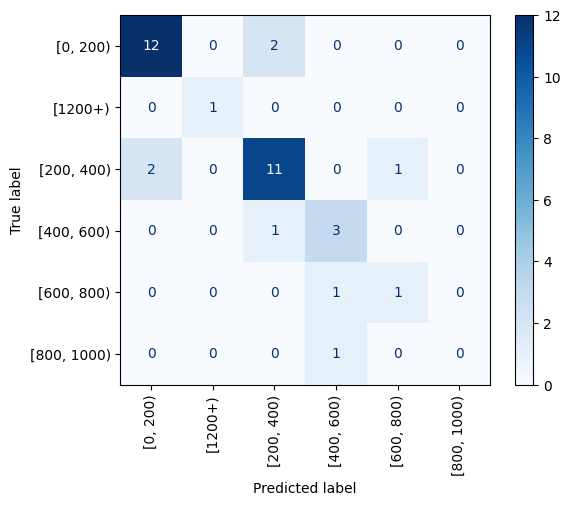

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import joblib

# Load data
cycle_data = pd.read_json("data_to_use/cycle_data.json")
screen_time_data = pd.read_csv("data_to_use/average_time_per_video.csv")

# Preprocess cycle data
cycle_data["start_date"] = pd.to_datetime(cycle_data["period_start_date"])
cycle_data["end_date"] = pd.to_datetime(cycle_data["period_end_date"])
cycle_data = cycle_data.sort_values(by="start_date")

# Create a continuous date range with labels for "on-cycle" days
date_range = pd.date_range(cycle_data["start_date"].min(), cycle_data["end_date"].max())
all_dates = pd.DataFrame({"date": date_range})
all_dates["on_cycle"] = all_dates["date"].apply(
    lambda d: any((d >= start and d <= end) for start, end in zip(cycle_data["start_date"], cycle_data["end_date"]))
)

# Preprocess screen time data
screen_time_data["Date"] = pd.to_datetime(screen_time_data["Date"])
screen_time_data["In Cycle"] = screen_time_data["In Cycle"].apply(lambda x: 1 if x == "Yes" else 0)

# Define intervals for Videos Watched
def categorize_videos_watched(videos):
    if videos < 200:
        return "[0, 200)"
    elif videos < 400:
        return "[200, 400)"
    elif videos < 600:
        return "[400, 600)"
    elif videos < 800:
        return "[600, 800)"
    elif videos < 1000:
        return "[800, 1000)"
    elif videos < 1200:
        return "[1000, 1200)"
    else:
        return "[1200+)"
screen_time_data["Videos Watched Category"] = screen_time_data["Videos Watched"].apply(categorize_videos_watched)

# Add rolling averages for Watch Hours
screen_time_data["Rolling Watch Hours"] = screen_time_data["Watch Hours"].rolling(window=3, min_periods=1).mean()

# Split screen time data into training and testing
screen_time_cutoff = int(len(screen_time_data) * 0.8)
screen_time_train_data = screen_time_data.iloc[:screen_time_cutoff]
screen_time_test_data = screen_time_data.iloc[screen_time_cutoff:]

# Prepare features and target for oversampling
videos_features = ["Watch Hours", "Time per Video (min)", "In Cycle", "Rolling Watch Hours"]
X_train = screen_time_train_data[videos_features]
y_train = screen_time_train_data["Videos Watched Category"]

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Train the videos watched model with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="accuracy",
    cv=3
)
grid_search.fit(X_resampled, y_resampled)
videos_model = grid_search.best_estimator_
print("\nBest Parameters for Videos Model:\n", grid_search.best_params_)

# Print feature importance
feature_importance = pd.Series(videos_model.feature_importances_, index=videos_features).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)

# Unified prediction function
def unified_predict(row):
    # Prepare features for prediction
    features = {
        "Watch Hours": row["Watch Hours"],
        "Time per Video (min)": row["Time per Video (min)"],
        "In Cycle": row["In Cycle"],
        "Rolling Watch Hours": row["Rolling Watch Hours"],
    }

    # Predict videos watched category
    videos_category = videos_model.predict(pd.DataFrame([features]))[0]
    return videos_category

# Test the combined model
def test_combined_model(screen_time_test_data):
    results = []

    for idx, row in screen_time_test_data.iterrows():
        # Unified prediction
        predicted_videos_category = unified_predict(row)

        # Append actual and predicted values
        results.append({
            "Date": row["Date"],
            "Predicted Videos Watched Category": predicted_videos_category,
            "Actual Videos Watched Category": row["Videos Watched Category"],
        })

    # Convert results to a DataFrame for analysis
    results_df = pd.DataFrame(results)
    return results_df

# Evaluate the combined model
results_df = test_combined_model(screen_time_test_data)

# Confusion Matrix for Videos Watched Category
y_true = results_df["Actual Videos Watched Category"]
y_pred = results_df["Predicted Videos Watched Category"]

conf_matrix = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(y_true.unique()))
disp.plot(cmap="Blues", xticks_rotation="vertical")
print("\nClassification Report:")
print(classification_report(y_true, y_pred))
